0.005232955582223615


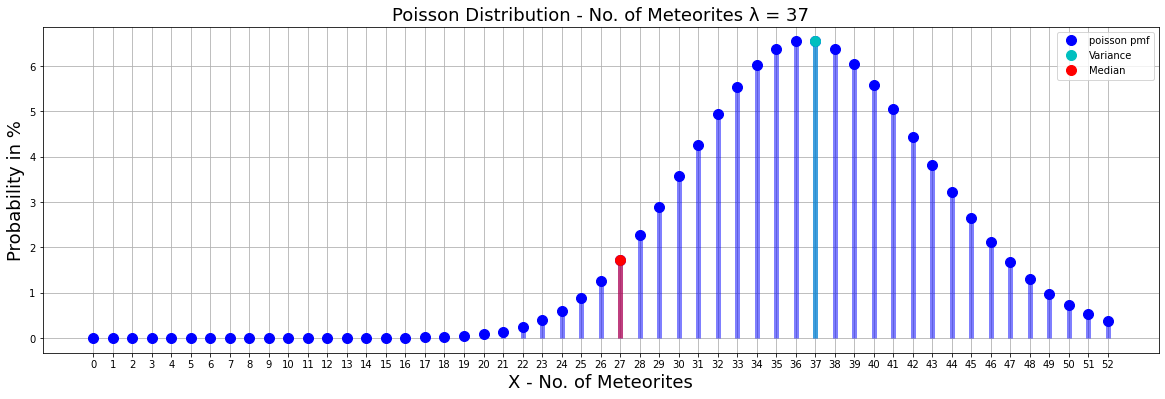

In [2]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Definitions
tick_increment = 1
lmbda = 37
n = 53
X = np.arange(0, n, 1)

mean, var, skew, kurt = poisson.stats(lmbda, moments='mvsk')
median = (len(X) + 1) / 2

# PMF of the distribution in %
poisson_pd = poisson.pmf(X, lmbda) * 100

p_lmbda = poisson.pmf(k=var, mu=lmbda) * 100
p_median = poisson.pmf(k=median, mu=lmbda) * 100

# Plot the probability distribution
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

#ax.plot(X, poisson_pd, 'bo', ms=10, label='poisson pmf')
#PMF
plt.xlabel("X - No. of Meteorites", fontsize="18")
plt.plot(X, poisson_pd, 'bo', ms=10, label='poisson pmf')
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

#Variance
plt.plot(var, p_lmbda, 'co', ms=10, label='Variance')
ax.vlines(var, 0, p_lmbda, colors='c', lw=5, alpha=0.5)

#Median
plt.plot(median, p_median, 'ro', ms=10, label='Median')
ax.vlines(median, 0, p_median, colors='r', lw=5, alpha=0.5)

plt.xticks(np.arange(0, n, tick_increment))
plt.title("Poisson Distribution - No. of Meteorites λ = 37", fontsize="18")

plt.ylabel("Probability in %", fontsize="18")
ax.grid(True)

plt.legend(loc='best', frameon=True)
plt.savefig('images/task_1_b.svg')